## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/tripadviser_review.csv")

In [3]:
df.head()

,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


#### Feature Description
- rating : 이용자 리뷰의 평가 점수
- text : 이용자 리뷰 평가 내용

-----

## 2) 데이터셋 살펴보기

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
df.shape

(1001, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1001 non-null   int64 
 1   text    1001 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

rating    0
text      0
dtype: int64

In [7]:
df['text'][0]

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.'

In [8]:
df['text'][100]

'올 봄에 벚꽃기간에 방문, 협재를 바라보는 바다뷰가 좋고 대로변이라 렌트해서 가기도 좋음. 조식은 이용안했는데 근처 옹포밥집까지 아침 산책겸 걸어가서 하고옴. 루프탑 수영장과 바가 있었는데 내가 갔을때는 밤에 비바람이 너무 불어서 이용못하고옴 ㅠㅠ  단점으로는 모 유명 여행블로거 리뷰처럼 화장실 물떄가... 그거빼곤 다 만족'

In [9]:
len(df['text'].values.sum())

223576

-----

## 3) 한국어 텍스트 데이터 전처리

### 3-0) konlpy 설치

In [10]:
import sys

sys.version

'3.8.10 (default, Nov 14 2022, 12:59:47) \n[GCC 9.4.0]'

In [11]:
# konlpy 0.5.2의 JVM 버그로 인해, 0.5.1 버전으로 install > JVM 버그 고쳐졌나봄. 0.5.2 사용 권장.
# 원래 코드 : !pip install konlpy==0.5.1 jpype1 Jpype1-py3

!pip install konlpy==0.5.2 jpype1 Jpype1-py3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 1.9 MB/s eta 0:00:00
  Created wheel for Jpype1-py3: filename=JPype1_py3-0.5.5.4-cp38-cp38-linux_x86_64.whl size=3470361 sha256=ee925a259b329c2bafa720b0204ad5426ed1f8ad3aa48b18f1b74eb740e19438
  Stored in directory: /root/.cache/pip/wheels/e2/62/cb/64ba4955005a2d19364d9162893985494be2cbfe6130dcbba4
Successfully built Jpype1-py3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### 3-1) 정규표현식 적용

In [12]:
import re

def apply_regular_expression(text):
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
  result = hangul.sub('', text)
  return result

In [13]:
apply_regular_expression(df['text'][0])

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다'

In [14]:
type(apply_regular_expression(df['text'][0]))

str

In [15]:
df['text'][0]

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.'

In [16]:
type(df['text'][0])

str

-----

### 3-2) 한국어 형태소분석 - 명사 단위

##### 명사 형태소 추출

In [17]:
import sys

sys.version

'3.8.10 (default, Nov 14 2022, 12:59:47) \n[GCC 9.4.0]'

In [18]:
from konlpy.tag import Okt
from collections import Counter

# noun = 명사
# tolist()는 배열(array)로 선언된 변수를 list형식으로 바꿔주는 함수.
## 반대로 list를 array로 만드려면 np.array()를 사용.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(apply_regular_expression(df['text'][0]))
nouns

['여행', '집중', '휴식', '제공', '호텔', '위치', '선정', '또한', '청소', '청결', '상태']

In [19]:
nouns = nouns_tagger.nouns(apply_regular_expression("".join(df['text'].tolist())))

In [20]:
type(nouns)

list

In [21]:
counter = Counter(nouns)
counter.most_common(10)

[('호텔', 803),
 ('수', 498),
 ('것', 436),
 ('방', 330),
 ('위치', 328),
 ('우리', 327),
 ('곳', 320),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264)]

In [22]:
type(counter.most_common(10)[0])

tuple

##### 한글자 명사 제거

In [64]:
available_counter = Counter({x : counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('호텔', 803),
 ('위치', 328),
 ('우리', 327),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264),
 ('가격', 245),
 ('객실', 244),
 ('시설', 215),
 ('제주', 192)]

-----

### 3-3) 불용어 사전

In [24]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

In [25]:
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [26]:
jeju_list = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']

for word in jeju_list:
  stopwords.append(word)

-----

### 3-4) Word Count

##### BoW 벡터 생성


###### Bow의 의미


Bag of Words란 단어들의 **순서는 전혀 고려하지 않고**, **단어들의 출현 빈도(frequency)에만 집중**하는 텍스트 데이터의 수치화 표현 방법이다.Bag of Words를 직역하면 단어들의 가방이라는 의미이다. 단어들이 들어있는 가방을 상상해보자. 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣는다. 그러고나서 이 가방을 흔들어 단어들을 섞는다. 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게 된다. 또한 가방을 흔들어서 단어를 섞었기 떄문에 더 이상 단어의 순서는 중요하지 않는다.


---
**Bow 만드는 과정**

```
과정 1.   우선, 각 단어의 고유한 인덱스(Index)를 부여한다.
과정 2.   각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터(Vector)를 만든다.
```

In [27]:
# CountVectorizer : 정해진 메소드에 따라 단어에 값을 부여할 때 각 문장에서 해당 단어가 나타나는 횟수를 부여한다.
# CountVectorizer : 즉, 문서 단어 행렬을 만든다.
# 아래에서 지정한 메소드는 text_cleaning
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
  result = hangul.sub('', text)
  tagger = Okt()
  nouns = nouns_tagger.nouns(result)
  nouns = [x for x in nouns if len(x) > 1]
  nouns = [x for x in nouns if x not in stopwords]
  return nouns

vect = CountVectorizer(tokenizer = lambda x : text_cleaning(x))     
bow_vect = vect.fit_transform(df['text'].tolist())                  # corpus 리스트 내부 텍스트로 부터 각 단어의 빈도 수를 기록합니다.

word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [28]:
text_cleaning(df['text'][0])

['집중', '휴식', '제공', '위치', '선정', '또한', '청소', '청결', '상태']

In [62]:
vect

CountVectorizer(tokenizer=<function <lambda> at 0x7fb8448bdb80>)

In [29]:
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
word_list[:20]

['가가',
 '가게',
 '가격',
 '가격표',
 '가구',
 '가급',
 '가기',
 '가까이',
 '가끔',
 '가능',
 '가도',
 '가동',
 '가두',
 '가득',
 '가든',
 '가라',
 '가량',
 '가려움',
 '가로',
 '가면']

In [31]:
# 첫번째 단어는 4번 등장, 두번째 단어는 8번 등장......
count_list

array([  4,   8, 245, ...,   1,   7,  14])

In [32]:
bow_vect.shape

(1001, 3599)

In [33]:
# word : count 쌍을 딕셔너리로 묶음
# 단어 : 빈도수
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'가가': 4, '가게': 8, '가격': 245, '가격표': 1, '가구': 8, '가급': 1, '가기': 20, '가까이': 20, '가끔': 5, '가능': 10, '가


-----

### 3-5) TF-IDF 적용

쉬운 설명은 해당 링크 참조.

https://m.blog.naver.com/myincizor/221644893910

<br>

TF-IDF(Term Frequency - Inverse Document Frequency)는 정보 검색과 텍스트 마이닝에서 이용하는 **가중치**로, 여러 문서로 이루어진 문서군이 있을 때 **어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치**이다. 문서의 핵심어를 추출하거나, 검색 엔진에서 검색 결과의 순위를 결정하거나, 문서들 사이의 비슷한 정도를 구하는 등의 용도로 사용할 수 있다.

**TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값**으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것을 **DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF**(역문서 빈도, inverse document frequency)라고 한다. **TF-IDF는 TF와 IDF를 곱한 값**이다.

IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.

<br>

**[결론]**

TF = 특정 단어가 한 문서 내에서 출현한 빈도

IDF = 특정한 단어가 출현한 전체 문서의 개수

***TF***

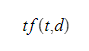

***IDF***

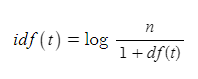

IDF에서 분모에 1을 더하는 이유 : 분모가 0이 되는 것을 방지하기 위함.

##### TF-IDF 변환

In [34]:
# TfidfTransformer : 위에서 CountVectorizer로 만든 문서 단어 행렬을 이용하여 Tf-idf값을 구한다.
# TFidfVectorizer 메소드를 사용하면 CountVectorizer로 문서 단어 행렬을 만들지 않고 TF-IDF값을 구할 수 있음.
# 사이킷런의 Tfidf 메소드는 분모 뿐만이 아니라 분자에도 1을 더하니 주의할 것.
# tf_idf_vect는 뒤에 나올 train_test_split 시, 독립변수(x값)로 사용됨
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [35]:
# 단어의 빈도수, 단어의 가중치에 따라 결정되는 값
tf_idf_vect.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13061347, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
print(tf_idf_vect[1])

  (0, 3564)	0.29923271422762543
  (0, 3022)	0.1310296542620457
  (0, 3021)	0.196633079963758
  (0, 3009)	0.31704594477870507
  (0, 2606)	0.2509675649140284
  (0, 2392)	0.196633079963758
  (0, 2388)	0.23481237385879722
  (0, 2299)	0.31704594477870507
  (0, 2234)	0.20270241560043137
  (0, 2013)	0.2509675649140284
  (0, 1296)	0.31704594477870507
  (0, 1277)	0.27679069782330573
  (0, 1188)	0.31704594477870507
  (0, 299)	0.2561421072536703
  (0, 185)	0.18768840123025857
  (0, 106)	0.11935656167107694


In [37]:
# 블로그 예제
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

doc1 = "She likes python"
doc2 = "She hates python"

count_vec = CountVectorizer()
document_term_matrix = count_vec.fit_transform([doc1, doc2]).toarray()

tfidf_trans = TfidfTransformer()
tfidf_trans.fit_transform(document_term_matrix).toarray()
print(document_term_matrix, '\n')
print(tfidf_trans.idf_)

[[0 1 1 1]
 [1 0 1 1]] 

[1.40546511 1.40546511 1.         1.        ]


##### 벡터 : 단어 맵핑

In [38]:
vect.vocabulary_

{'집중': 2866,
 '휴식': 3588,
 '제공': 2696,
 '위치': 2311,
 '선정': 1584,
 '또한': 790,
 '청소': 2927,
 '청결': 2925,
 '상태': 1527,
 '이상': 2392,
 '침대': 3022,
 '이불': 2388,
 '침구': 3021,
 '교체': 299,
 '어메니티': 2013,
 '보강': 1296,
 '베스트': 1277,
 '웨스턴': 2299,
 '회원': 3564,
 '경우': 185,
 '객실': 106,
 '층수': 3009,
 '요청': 2234,
 '적극': 2606,
 '반영': 1188,
 '지인': 2837,
 '소개': 1629,
 '처음': 2910,
 '당황': 611,
 '세면': 1607,
 '도구': 675,
 '잠옷': 2555,
 '필수': 3358,
 '그것': 361,
 '정도': 2673,
 '다음': 578,
 '여기': 2074,
 '박만': 1171,
 '저녁': 2595,
 '맥주': 981,
 '한잔': 3414,
 '렌트': 838,
 '뚜벅': 791,
 '바로': 1159,
 '버스': 1247,
 '정류': 2676,
 '도착': 697,
 '가방': 24,
 '일찍': 2487,
 '정비': 2685,
 '방이': 1225,
 '입실': 2500,
 '업그레이드': 2038,
 '직원': 2849,
 '정말': 2680,
 '바다': 1148,
 '전망': 2623,
 '전일': 2636,
 '함덕': 3425,
 '대명': 624,
 '콘도': 3091,
 '실내': 1861,
 '분위기': 1384,
 '손님': 1659,
 '가장': 40,
 '배치': 1241,
 '대해': 651,
 '대응': 634,
 '써비스': 1889,
 '조식': 2730,
 '부분': 1351,
 '신경': 1838,
 '아주': 1922,
 '특급': 3208,
 '트랜디': 3191,
 '고민': 210,
 '흔적': 3593,
 '여름': 20

In [39]:
invert_index_vectorizer = {v : k for k, v in vect.vocabulary_.items()}  # vect.vocabulary_ : vect의 각 단어의 인덱스가 어떻게 부여되었는지를 보여줍니다.
print(str(invert_index_vectorizer)[:100])

{2866: '집중', 3588: '휴식', 2696: '제공', 2311: '위치', 1584: '선정', 790: '또한', 2927: '청소', 2925: '청결', 1527


-----

## 4) Logistic Regression 분류

### 4-1) 데이터셋 생성

##### Rating 데이터 이진으로 변환

In [ ]:
df.head()

,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


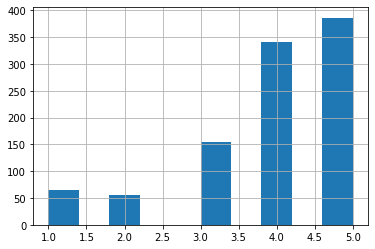

In [ ]:
df.rating.hist()

In [ ]:
df.sample(10).head()

,rating,text
48,5,우선 호텔 위치가 공항에서 가깝고요 방도 업그레이드 해줬습니다. 별관에서 본관으...
269,4,"최상의 위치, distric 쇼핑 근처 레스토랑, 버스 정류장. 공항에서 가깝고(1..."
340,5,room : 깨끗하고 넓으며 2 인용으로 충분합니다. 그러나 두 침대가 더블 침대이...
647,3,호텔은 공항과 매우 가까우며 로비에 7 개의 11 개가있어 편리합니다. 그러나 서비...
149,5,깨끗하고 좋아요~ 추천하려면 하고 다음에도 또 올꺼고 옆에 진짜 맛있는 해장국집도...


In [40]:
'''
이진 분류 부분
rating이 4, 5점에 해당되면 긍정적.
rating이 1, 2, 3점에 해당되면 부정적.

이를 새로운 칼럼을 만들어서 긍정적이면 1, 그 외에는 0으로 분류
'''
def rating_to_label(rating):
  if rating > 3:
    return 1
  else:
    return 0
df['y'] = df['rating'].apply(lambda x : rating_to_label(x))

In [ ]:
df.head()

,rating,text,y
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...,1
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입...",1
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...,1
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...,1
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...,1


In [ ]:
df.y.value_counts()

1    726
0    275
Name: y, dtype: int64

-----

### 4-2) 데이터셋 분리

In [41]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(700, 3599)
(301, 3599)


In [52]:
x_train.toarray()[0].tolist()

[0.0,
 0.0,
 0.07541634317820864,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1847227812262092,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07965540823035008,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [54]:
y_train

710    0
745    0
582    0
133    1
194    1
      ..
278    1
333    1
807    1
598    1
664    1
Name: y, Length: 800, dtype: int64

-----

### 4-3) 모델 학습

##### Logistic Regression 학습

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

##### 분류 결과 평가

In [ ]:
confusion_matrix(y_test, y_pred)

array([[  5,  73],
       [  0, 223]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7574750830564784

In [ ]:
precision_score(y_test, y_pred)

0.7533783783783784

In [ ]:
recall_score(y_test, y_pred)

1.0

In [ ]:
f1_score(y_test, y_pred)

0.8593448940269749

In [ ]:
# y=1과 y=0의 샘플링의 크기가 다르기 때문에 편향된 예측을 함.
# y=1의 크기는 700개, y=0의 크기는 301개임.
# 여기서 y=1로만 찍어도 예측율이 0.7이 됨.
# 따라서 샘플링의 크기를 같게 재조정을 할 필요가 있음.
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[  5  73]
 [  0 223]]


-----

### 4-4) 샘플링 재조정

##### 1:1 Sampling

In [ ]:
positive_sample_idx = df[df['y']==1].sample(275, random_state=33).index.tolist()
negative_sample_idx = df[df['y']==0].sample(275, random_state=33).index.tolist()
random_idx = positive_sample_idx + negative_sample_idx

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tf_idf_vect[random_idx], df['y'][random_idx], test_size = 0.3)

In [ ]:
print(x_train.shape)

(385, 3599)


In [ ]:
print(x_test.shape)

(165, 3599)


In [ ]:
y_train.value_counts()

0    193
1    192
Name: y, dtype: int64

##### 모델 재학습

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

##### 분류 결과 평가

In [ ]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7818181818181819
0.7974683544303798
0.7590361445783133
0.7777777777777778


In [ ]:
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[66 16]
 [20 63]]


-----

## 5) 긍정/부정 키워드 분석

##### Logistic Regression 모델의 coef 분석

In [ ]:
# lr.coef_와 lr.coef_[0]의 차이는 lr.coef_는 괄호가 두 개, lr.coef_[0]은 괄호가 한 개
# 이걸 데이터프레임화 시키면 lr.coef_은 row는 하나, column만 주구장창 나옴.
# 반면에 lr.coef_[0]은 정상적으로 row가 3599개, column은 하나가 뜸.
lr.coef_[0]

array([[0.29864987, 0.27249072, 0.43832964, ..., 0.        , 0.02101963,
        0.38452289]])

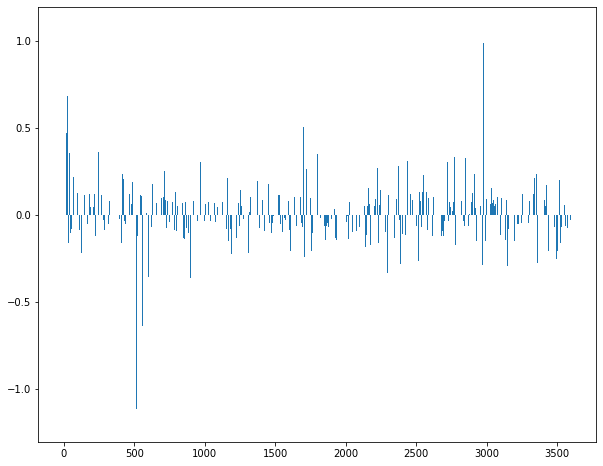

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

plt.show()

In [ ]:
df_coef = pd.DataFrame(lr.coef_[0])
df_coef.columns = ['coef']
df_coef.head()

,coef
0,0.298650
1,0.272491
2,0.438330
3,0.000000
4,0.004349


In [ ]:
neg_index_10 = df_coef.sort_values(by='coef').head(10).index
print(f'부정적인 단어 10개 : {neg_index_10}')
invert_index_vectorizer[1293]

부정적인 단어 10개 : Int64Index([1293, 515, 363, 1675, 2966, 558, 567, 3538, 1909, 1046], dtype='int64')


'별로'

##### 긍정/부정 키워드 출력

In [ ]:
lr.coef_[0]

array([0.29864987, 0.27249072, 0.43832964, ..., 0.        , 0.02101963,
       0.38452289])

In [ ]:
'''
코드 설명
# 위에거는 가장 긍정적인 5개의 리뷰에 대한 정보를 나타냄.
# 아래거는 가장 부정적인 5개의 리뷰에 대한 정보를 나타냄.
# 왼쪽 숫자가 커질수록 긍정적, 작아질수록 부정적.
# (1.2523469722092242, 2977)에서 2977번째 인덱스는 1.252 정도로 가장 긍정적이라는 의미.
# (-1.0217428474064871, 1293)에서 1293번째 인덱스는 -1.022정도로 가장 부정적이라는 의미.

함수 설명
enumerate() = 반복문 사용 시 몇번째 반복문인지 인덱스 번호와 해당 원소를 튜플형태로 반환
'''
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

[(1.083238528595846, 578), (1.022751085146313, 2400), (0.9966262508392211, 2957), (0.9908832161020463, 2977), (0.9840310843788325, 385)]
[(-0.7276613466308991, 2966), (-0.7945531071982457, 1675), (-0.8957302656565864, 363), (-1.1193722204687548, 515), (-1.1920507009589338, 1293)]


In [ ]:
# 위에거는 상위 n개의 긍정적인 인덱스, 아래거는 상위 n개의 부정적인 인덱스
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=False)
coef_pos_index

[(1.083238528595846, 578),
 (1.022751085146313, 2400),
 (0.9966262508392211, 2957),
 (0.9908832161020463, 2977),
 (0.9840310843788325, 385),
 (0.859138389758252, 2779),
 (0.7138365309433674, 131),
 (0.705009995636754, 1384),
 (0.6827598276071477, 26),
 (0.6784648442999069, 2730),
 (0.675354903533449, 826),
 (0.636344121614274, 1028),
 (0.6289226056870417, 1853),
 (0.5893360431765826, 2455),
 (0.5809528536420479, 1816),
 (0.5535300525949505, 1491),
 (0.5444323152033318, 956),
 (0.5198978042259592, 1217),
 (0.517535268586637, 2167),
 (0.5164192421012165, 1247),
 (0.5084945738009876, 627),
 (0.5053042490531611, 1700),
 (0.4944914285119937, 1159),
 (0.4877846716664475, 883),
 (0.47396327578246356, 19),
 (0.46917880547352375, 3428),
 (0.46893582249135607, 981),
 (0.46610739757071384, 660),
 (0.4490931433931324, 910),
 (0.44705465173123315, 1148),
 (0.4463995919945082, 2834),
 (0.4463564008381002, 2680),
 (0.4383296352377443, 2),
 (0.4338542374225313, 1695),
 (0.4337383833654608, 790),
 (0.4

In [ ]:
# invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

In [ ]:
invert_index_vectorizer

{2866: '집중',
 3588: '휴식',
 2696: '제공',
 2311: '위치',
 1584: '선정',
 790: '또한',
 2927: '청소',
 2925: '청결',
 1527: '상태',
 2392: '이상',
 3022: '침대',
 2388: '이불',
 3021: '침구',
 299: '교체',
 2013: '어메니티',
 1296: '보강',
 1277: '베스트',
 2299: '웨스턴',
 3564: '회원',
 185: '경우',
 106: '객실',
 3009: '층수',
 2234: '요청',
 2606: '적극',
 1188: '반영',
 2837: '지인',
 1629: '소개',
 2910: '처음',
 611: '당황',
 1607: '세면',
 675: '도구',
 2555: '잠옷',
 3358: '필수',
 361: '그것',
 2673: '정도',
 578: '다음',
 2074: '여기',
 1171: '박만',
 2595: '저녁',
 981: '맥주',
 3414: '한잔',
 838: '렌트',
 791: '뚜벅',
 1159: '바로',
 1247: '버스',
 2676: '정류',
 697: '도착',
 24: '가방',
 2487: '일찍',
 2685: '정비',
 1225: '방이',
 2500: '입실',
 2038: '업그레이드',
 2849: '직원',
 2680: '정말',
 1148: '바다',
 2623: '전망',
 2636: '전일',
 3425: '함덕',
 624: '대명',
 3091: '콘도',
 1861: '실내',
 1384: '분위기',
 1659: '손님',
 40: '가장',
 1241: '배치',
 651: '대해',
 634: '대응',
 1889: '써비스',
 2730: '조식',
 1351: '부분',
 1838: '신경',
 1922: '아주',
 3208: '특급',
 3191: '트랜디',
 210: '고민',
 3593: '흔적',
 2082: '여

In [ ]:
invert_index_vectorizer[385]

'근처'

In [ ]:
# invert_index_vectorizer 딕셔너리에서 인덱스 빼고 긍정적인 단어만 리스트로 뽑아내기
pos_list = []
for coef in coef_pos_index:
    pos_list.append(invert_index_vectorizer[coef[1]])
    # print(invert_index_vectorizer[coef[1]], coef[0])

In [ ]:
pos_list

In [ ]:
for coef in coef_neg_index[:15]:
    print(invert_index_vectorizer[coef[1]], coef[0])

냄새 -1.3163121095292618
별로 -1.1619844433241595
다른 -0.8634908897500504
최악 -0.6994140155571499
그냥 -0.6974560123347292
침대 -0.6966079469775018
화장실 -0.6755517172032797
노후 -0.6706467606649311
느낌 -0.6652777131702173
에어컨 -0.6295384632021115
예약 -0.5893151861671186
아무 -0.5859538929309703
진짜 -0.5801044925739788
모기 -0.5579164162043734
곰팡이 -0.5511386607779531
